In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
def cross_entropy(yHat, y):
    if y == 1:
        return -np.log(yHat)
    else:
        return -np.log(1 - yHat)

    
eps = 1e-9

p = np.linspace(0+eps, 1-eps, 200)
log_loss_0 = [cross_entropy(pred, 0) for pred in p]
log_loss_1 = [cross_entropy(pred, 1) for pred in p]

plt.figure(figsize = (8, 5))

plt.plot(p, log_loss_0, label = 'Klasa negatywna')
plt.plot(p, log_loss_1, label = 'Klasa pozytywna')

plt.title('Wykres zależności entropii krzyżowej od prawdopodobieństwa.')
plt.xlabel('Prawdopodobieństwo')
plt.ylabel('Entropia krzyżowa')
plt.legend()

plt.savefig('outputs/201_additional_plots/cross_entropy.png')

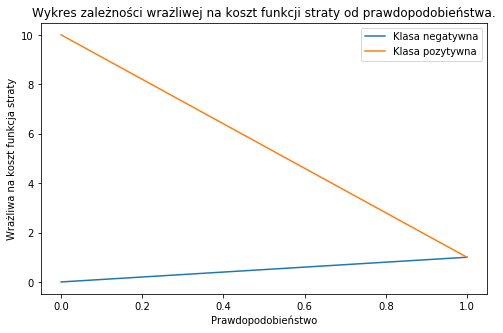

In [41]:
def cost_sensitive_ce(y_hat, y, fp, fn, tp, tn):
    # false positives, false negatives, true positives, true negatives
    if y == 1:
        return tp*y_hat + (1-y_hat)*fn
    else:
        return fp*y_hat + (1-y_hat)*tn

    
eps = 1e-9
fp = 1
fn = 10
tp = 1
tn = 0

p = np.linspace(0+eps, 1-eps, 200)
log_loss_0 = [cost_sensitive_ce(pred, 0, fp, fn, tp, tn) for pred in p]
log_loss_1 = [cost_sensitive_ce(pred, 1, fp, fn, tp, tn) for pred in p]

plt.figure(figsize = (8, 5))

plt.plot(p, log_loss_0, label = 'Klasa negatywna')
plt.plot(p, log_loss_1, label = 'Klasa pozytywna')

plt.title('Wykres zależności wrażliwej na koszt funkcji straty od prawdopodobieństwa.')
plt.xlabel('Prawdopodobieństwo')
plt.ylabel('Wrażliwa na koszt funkcja straty')
plt.legend()

plt.savefig('outputs/201_additional_plots/cost_sensitive_ce.png')
plt.show()